In [ ]:
from naive_infection import configure_from_file
from seasonal_challenge import monthly_eir_challenge, plot_timeseries, plot_heatmap

In [ ]:
params = configure_from_file('config.yaml')

Using a monthly EIR profile, we will randomly challenge an individual with the probability of infectious bites every day -- corrected for the surface-area age-dependent biting risk assuming that t=0 is a newborn.

In [ ]:
rafin_marke_monthly_eirs = [1, 1, 0.5, 1, 1, 2, 3.875, 7.75, 15.0, 3.875, 1, 1]

df = monthly_eir_challenge(
    duration=365*20,
    monthly_eirs=rafin_marke_monthly_eirs)

Below is the asexual parasite density (blue) and gametocyte density (green) for one individual over many years under repeated seasonal challenge from the functional forms described above.

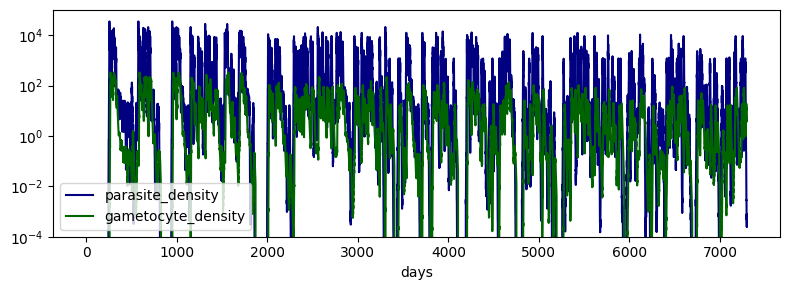

In [ ]:
plot_timeseries(df)

Below is the parasite density stacked for each year of life under repeated seasonal challenge from the functional forms described above.  This highlights the seasonal exposure term, the increased EIR at older ages, and the lower peak parasite densities with immune acquisition.

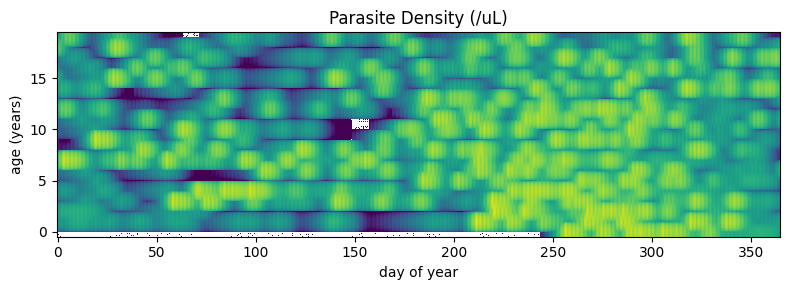

In [ ]:
plot_heatmap(df)

In [7]:
import numpy as np

MICROLITERS_PER_BLOODMEAL = 2.0  # from EMOD
base_gametocyte_mosquito_survival = 0.002011099  # from idmtools-calibra (post-2017 settings)

def infectiousness(g):
    # TODO: add cytokine killing fever effect here also
    return 1-np.exp(-(g * MICROLITERS_PER_BLOODMEAL * base_gametocyte_mosquito_survival))

In [8]:
df['infectiousness'] = df.gametocyte_density.map(infectiousness)

In [9]:
df.tail(20)

,parasite_density,gametocyte_density,fever_temperature,infectiousness
days,,,,
7280,1202.083130,2.416156,37.294228,0.009671
7281,333.943665,1.831677,38.126545,0.007340
7282,797.647583,1.517464,37.000557,0.006085
7283,130.002792,1.150170,37.054737,0.004616
7284,170.015259,1.299396,37.000328,0.005213
7285,21.904118,0.984951,37.008919,0.003954
7286,21.593863,2.089019,37.000000,0.008367
7287,2.522533,1.583742,37.000652,0.006350
7288,2.211889,5.323192,37.000000,0.021183
